# Covariance and correlation

## Covariance

If two random variables $X$ and $Y$ are _not_ [independent](independence), then they are called (naturally) _dependent_. Our goal in this chapter is to study a particular type of dependence between random variables.

To illustrate, let's recall the dataset from the [beginning](motivation) of the previous chapter consisting of pairs

$$
(x_1,y_1),(x_2,y_2),\ldots,(x_{2000},y_{2000}),
$$

where $x_i$ is the size of the $i$-th house (in ft$^2$) and $y_i$ is the selling price (in $1k). We saw that a scatter plot of the data is:

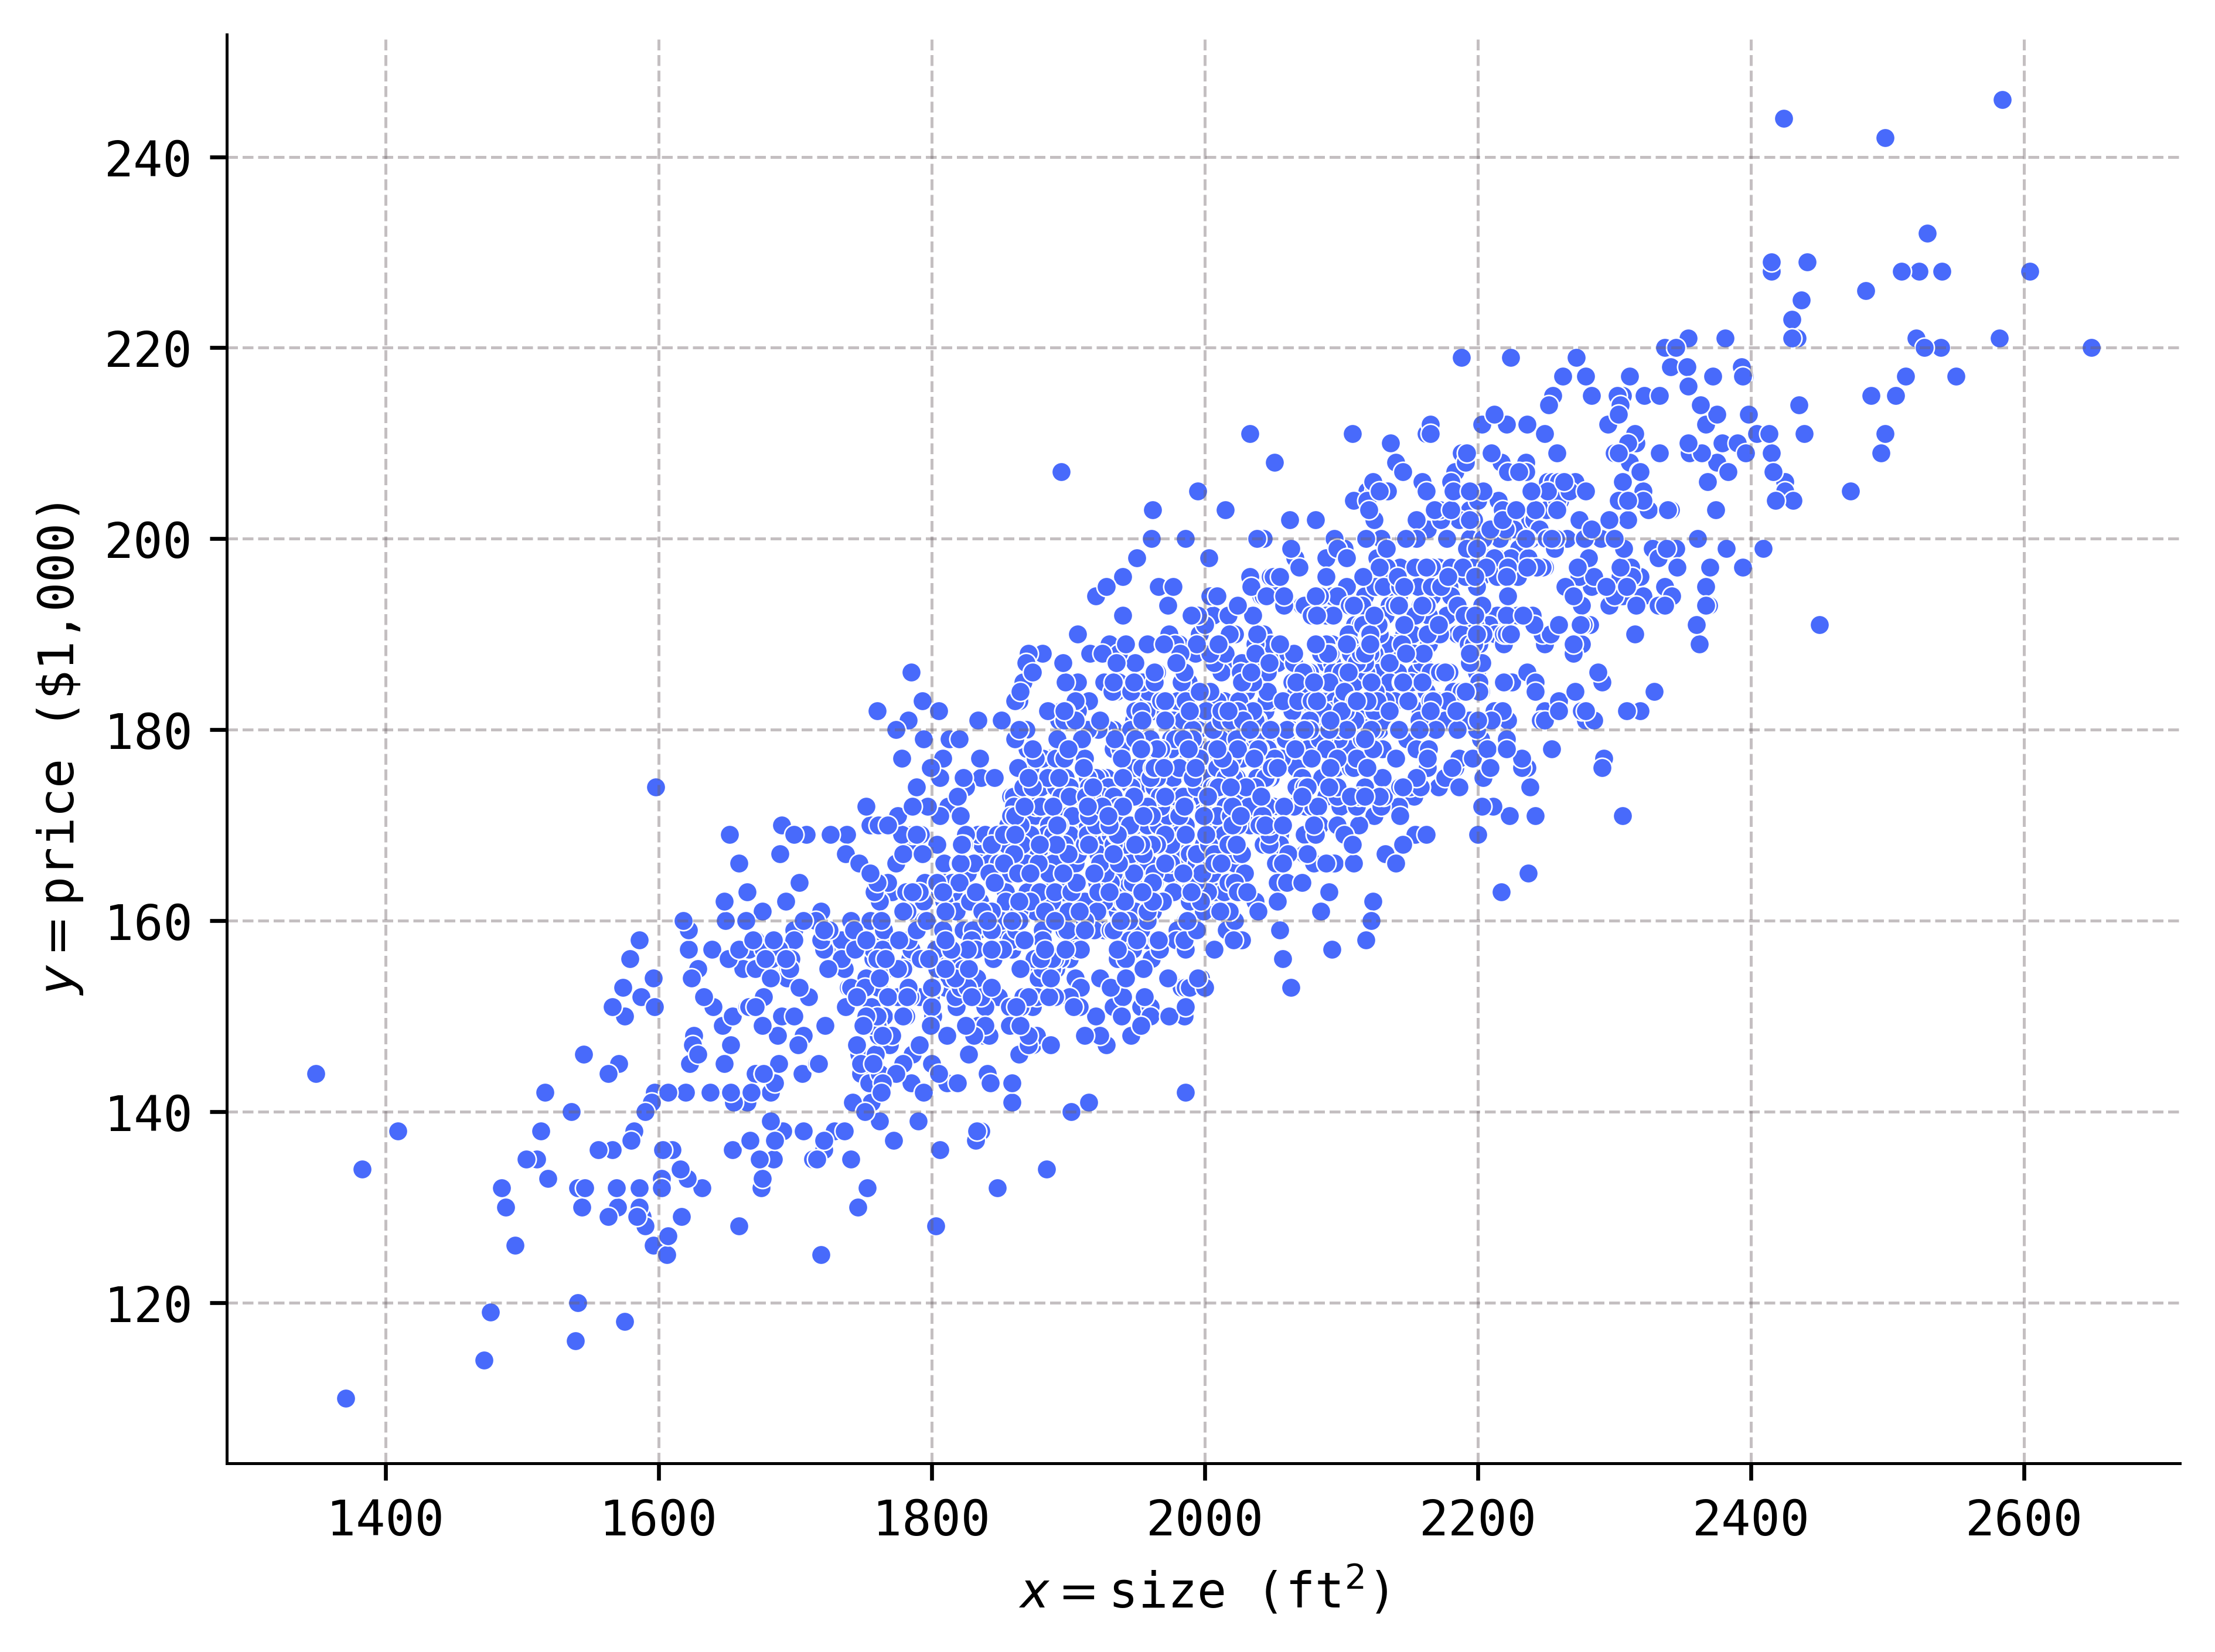

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

# hide annoying warnings for tight_layout()
import warnings
warnings.filterwarnings("ignore")

# set custom style for plots
plt.style.use('../aux-files/custom_style_light.mplstyle')

# make sure this comes last in the imports!
# change the output resolution and size of figures
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 600

# end import section

np.random.seed(42)

# data will be simulated from a multivariate gaussian.
# define the parameters
rho = 0.85
sigma_1 = 200
sigma_2 = 20
mu = np.array([2000, 175])
sigma = np.array([
    [sigma_1 ** 2, rho * sigma_1 * sigma_2],
    [rho * sigma_1 * sigma_2, sigma_2 ** 2]
])

# generate the data
data = multivariate_normal(mean=mu, cov=sigma).rvs(size=2000)
X = np.round(data[:, 0])
Y = np.round(data[:, 1])

# build the plots
sns.scatterplot(x=X, y=Y)
plt.xlabel('$x=$size (ft$^2$)')
plt.ylabel('$y=$price (\$1,000)')
plt.tight_layout()

From the plot, we see there is _clearly_ a dependence between the $x_i$'s and $y_i$'s. Indeed, when one value is large, the other tends to be large also. Another way to say this is that the $(x_i,y_i)$'s tend to cluster along a straight line of positive slope:

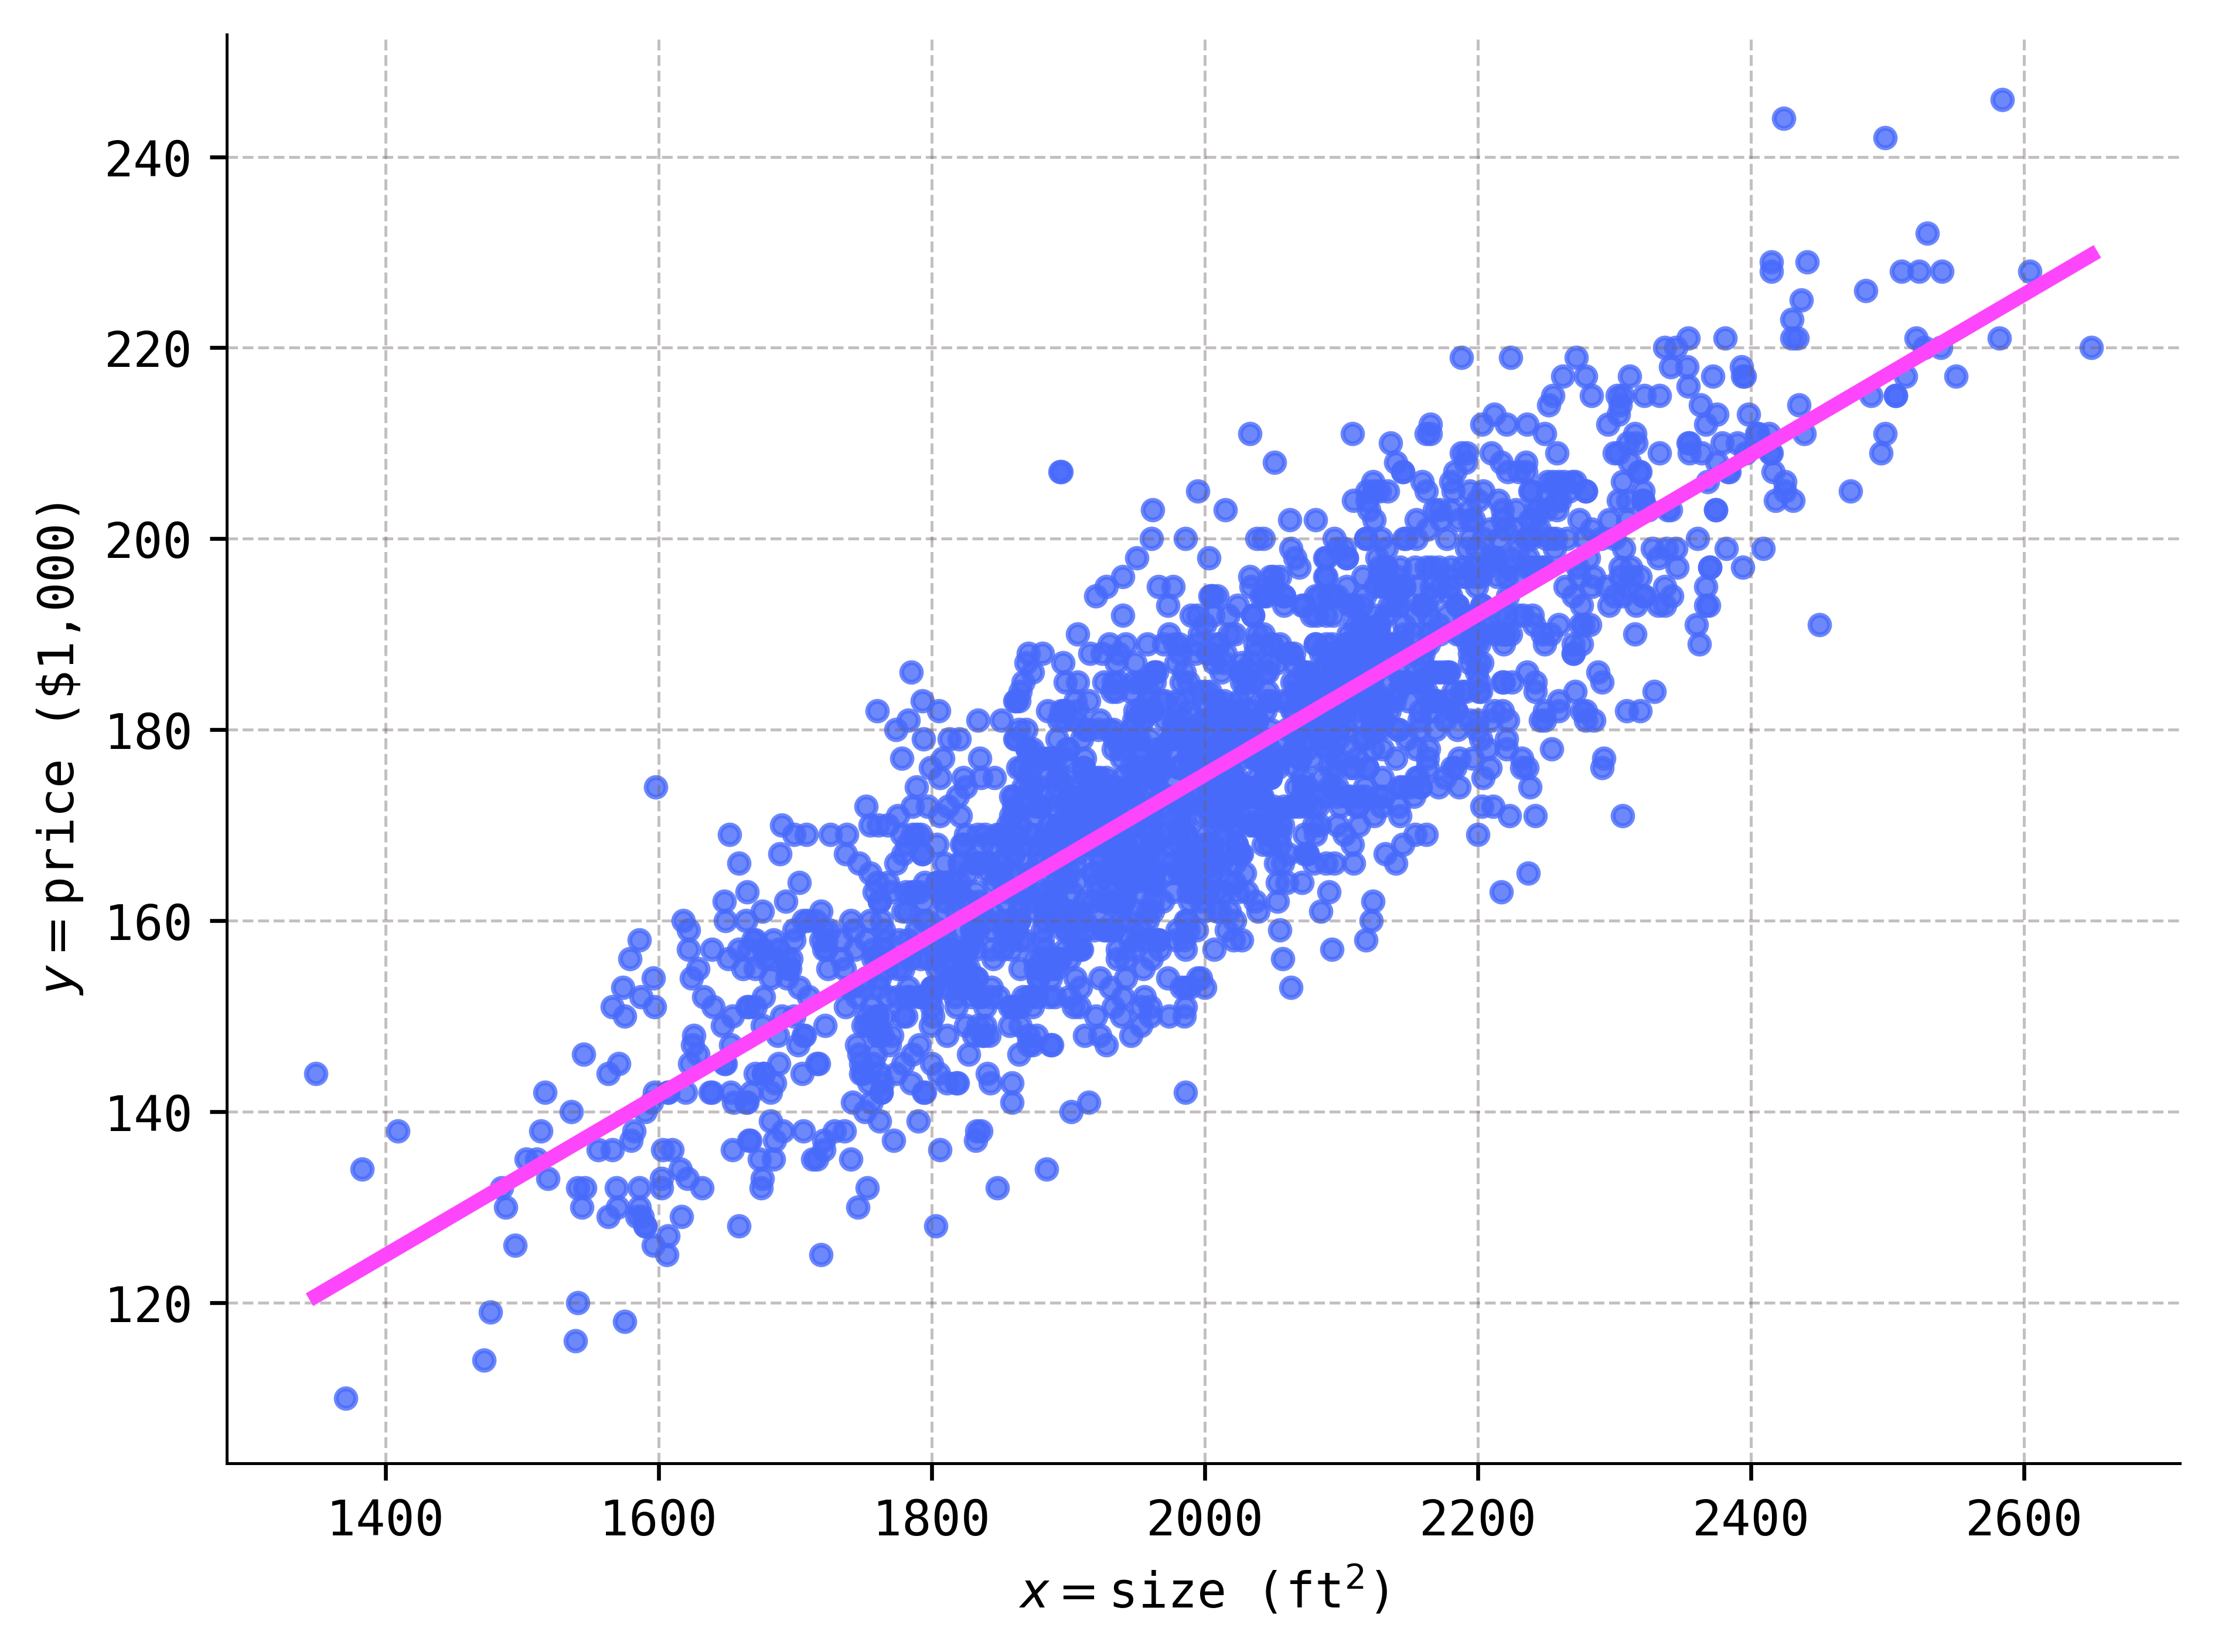

In [2]:
sns.regplot(x=X, y=Y, ci=None, line_kws={'color' : '#FD46FC'})
plt.xlabel('$x=$size (ft$^2$)')
plt.ylabel('$y=$price (\$1,000)')
plt.tight_layout()

This _linear_ type of dependence between two random variables is the topic of focus in this chapter.

Our first goal is to cook up some way to _quantify_ this type of linear dependence. To do this, we will leverage the type of observation made above regarding the housing dataset:

1. If the observed values of two random variables $X$ and $Y$ cluster along a line of _positive_ slope, then paired $x$'s and $y$'s tend to be large (and small) at the same time.

2. If the observed values of two random variables $X$ and $Y$ cluster along a line of _negative_ slope, then large values of $x$ tend to be paired with small values of $y$ (and vice versa).

Now, in order to make something of these observations, it is convenient to "center" the dataset by subtracting off the means:

$$
X \xrightarrow{\text{replace with}} X - \mu_X \quad \text{and} \quad Y \xrightarrow{\text{replace with}} Y - \mu_Y.
$$

Notice that

$$
E(X - \mu_X) = E(X) - E(\mu_X) = =0
$$

and similarly $E(Y-\mu_Y) = 0$, so that when we carry out these replacements, we get random variables with mean $0$. In the housing dataset, if we center the data by subtracting the means and then plot, we get this:

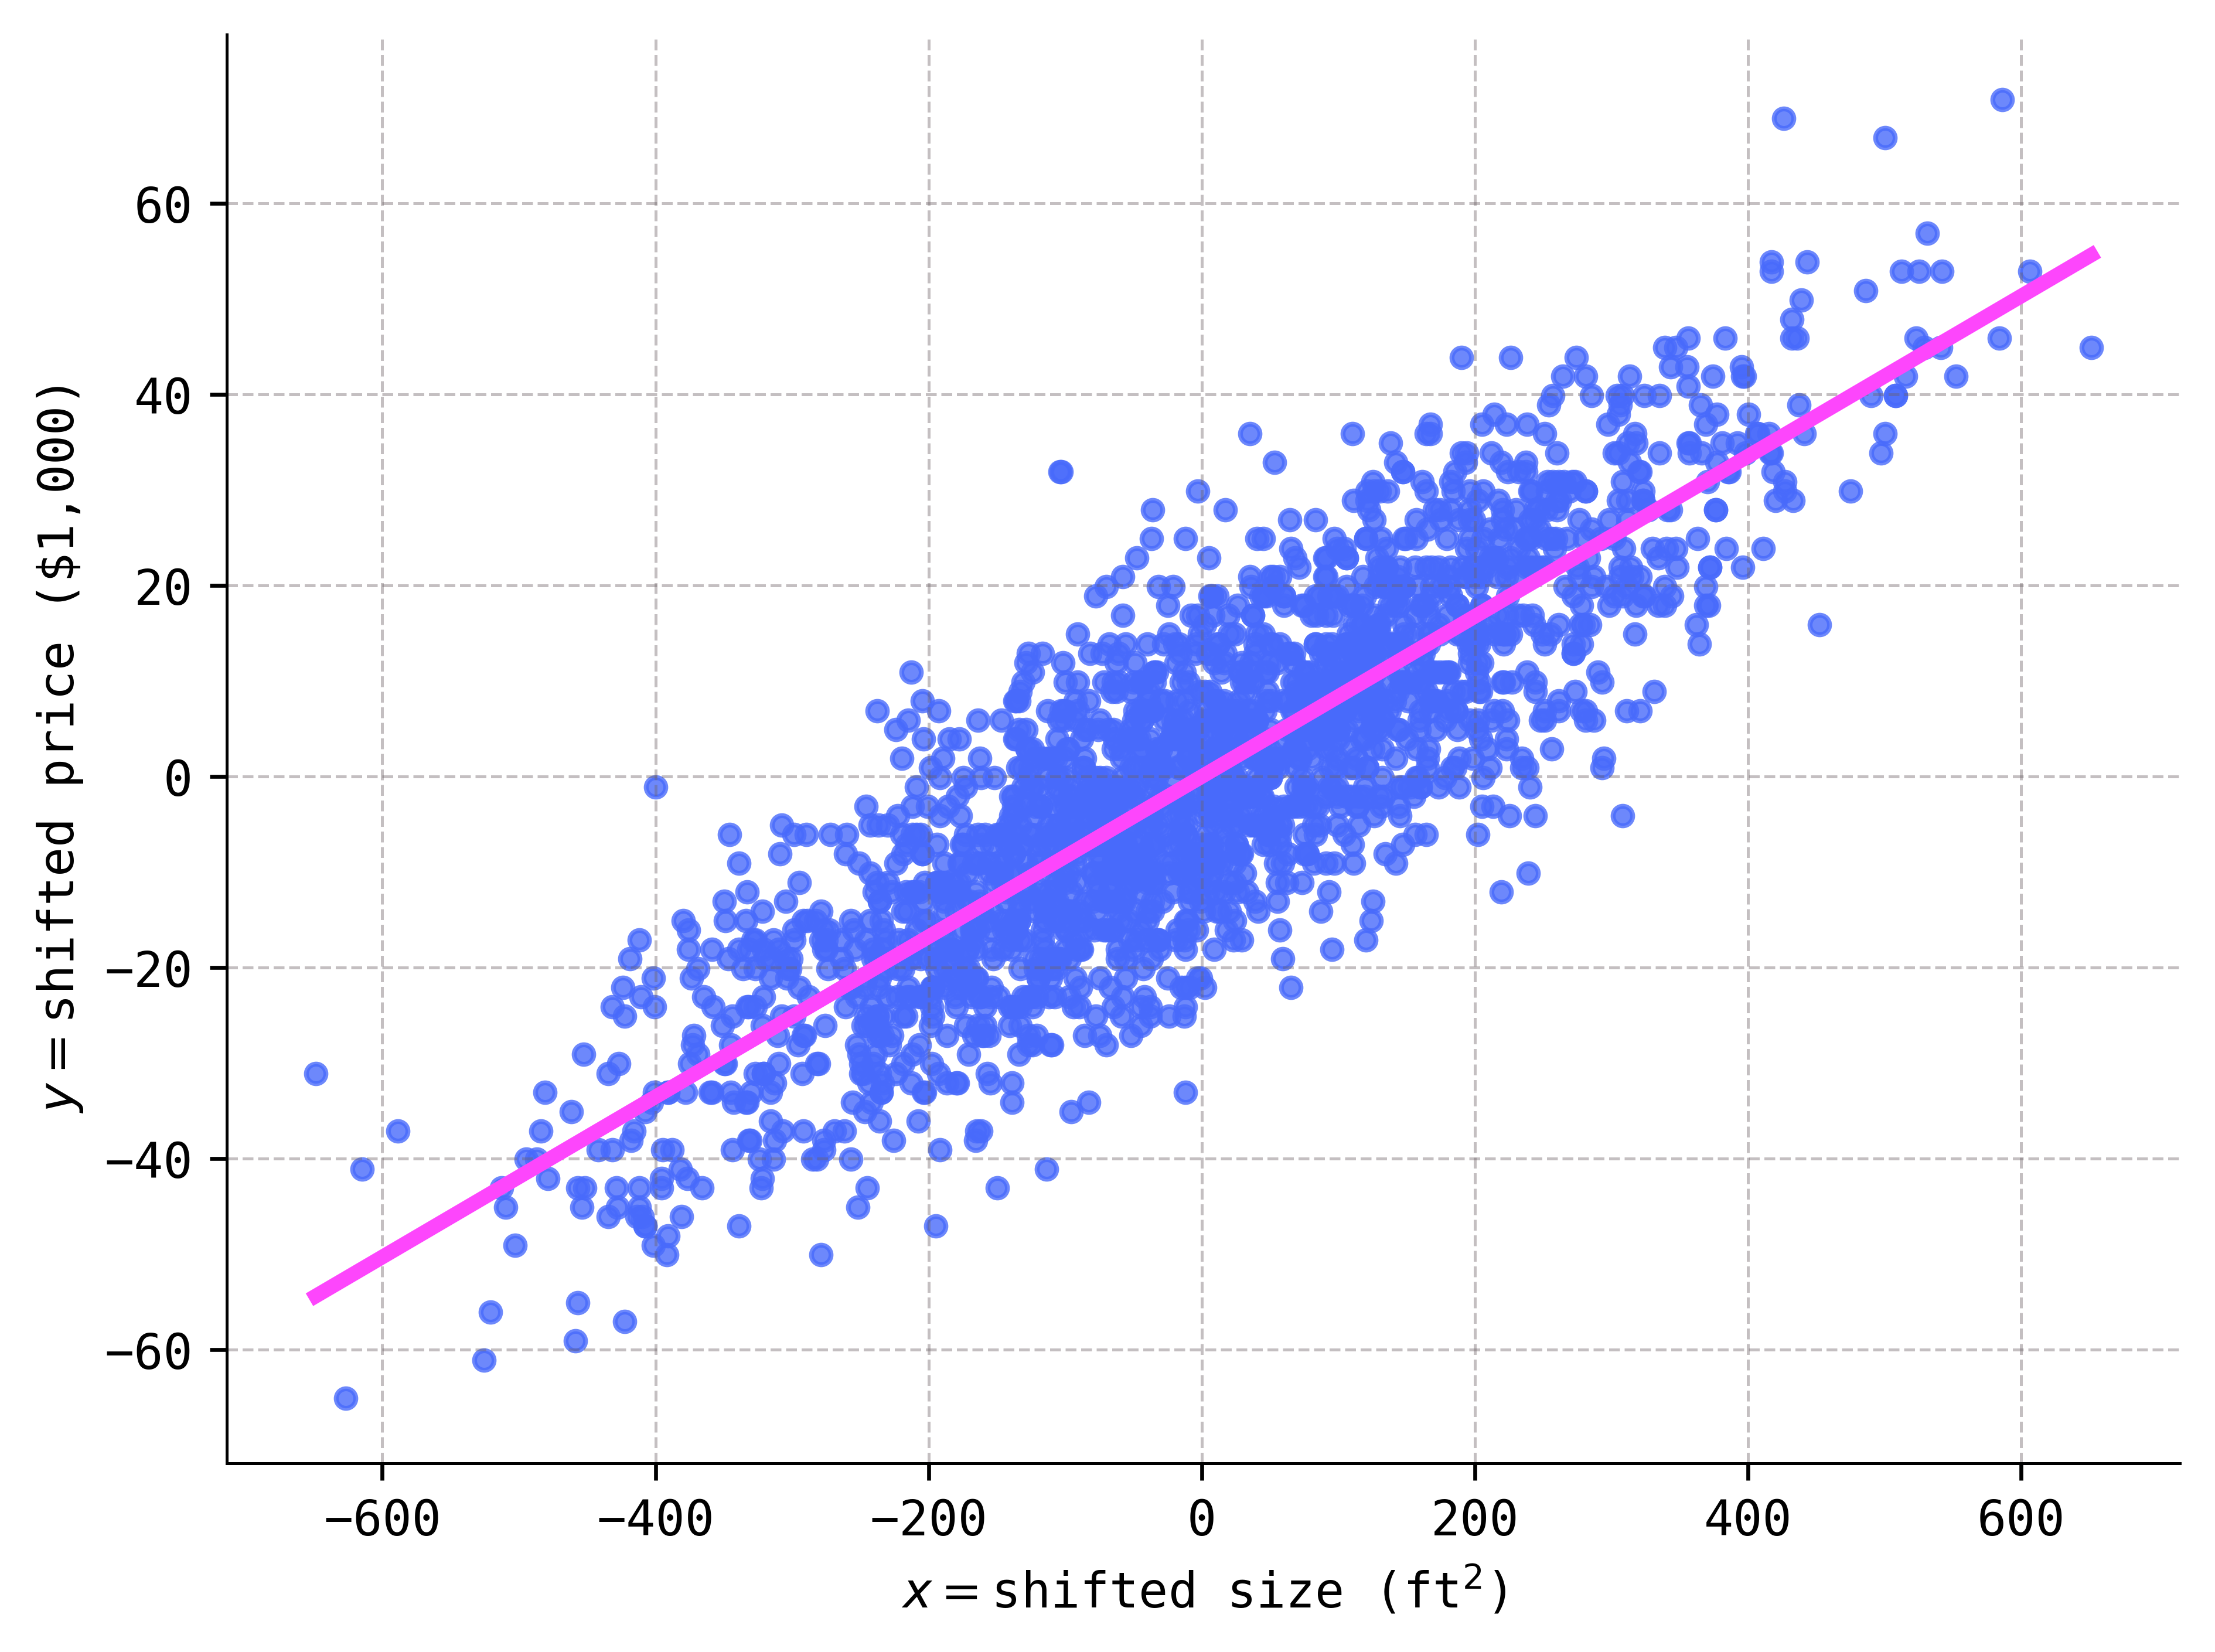

In [3]:
sns.regplot(x=X - np.mean(X), y=Y - np.mean(Y), ci=None, line_kws={'color' : '#FD46FC'})
plt.xlabel('$x=$shifted size (ft$^2$)')
plt.ylabel('$y=$shifted price (\$1,000)')
plt.tight_layout()

The reason that we "center" the data is because it allows us to conveniently rephrase our observations above in terms of signs:

1. If the observed values of two **centered** random variables $X$ and $Y$ cluster along a line of _positive_ slope, then paired $x$'s and $y$'s tend to have the same sign.

2. If the observed values of two **centered** random variables $X$ and $Y$ cluster along a line of _negative_ slope, then paired $x$'s and $y$'s tend to have opposite signs.

Now, consider the following:

```{prf:definition}

Let $X$ and $Y$ be two random variables with expectations $\mu_X = E(X)$ and $\mu_Y = E(Y)$. The _covariance_ of $X$ and $Y$, denoted $\operatorname{Cov}(X,Y)$, is defined via the equation

$$
\operatorname{Cov}(X,Y) = E \left[ (X-\mu_X)(Y-\mu_Y) \right].
$$
```

More to come later!